In [119]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for advanced visualizations
import folium
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# for providing path
import os

In [ ]:
# reading the data
data = pd.read_csv('C:\FAOW.csv', encoding = "ISO-8859-1")

# ENODING ISO-8859-1 is a single byte encoding which can represent the first 256 unicode characters
# Both UTF-8 and ISO-8859-1 encode the ASCII Characters the same.

# checking the shape of the data
print(data.shape)

Dalam analisis ini, saya menggunakan data dari jumlah produksi bahan pangan dari setiap negara diseluruh dunia. Data tersebut saya ambil dari Food and Agriculture Organization of the United Nations(FAO). Data tersebut menyajikan gambaran yang komprehensif mengenai pola pasokan makanan dalam setiap negara dalam periode tertentu, data resmi terakhir adalah data pada tahun 2013. Akan tetapi pada analisis saya pada kali ini, saya akan fokus mengulas produksi pangan dari 9 negara-negara ASEAN yaitu pada produksi gandum dari setiap negara.

Cara saya mengambil data negara ASEAN yaitu dengan cara menyalin data dari FAO tersebut ke dalam file csv yang baru secara utuh. Sehingga didapatkan data produksi pangan dari negara ASEAN.

In [121]:
data.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,IDN,101,Indonesia,2511,Wheat and products,5521,Feed,1000 tonnes,-0.79,113.92,...,136,133,138,139,135,140,144,168,188,202
1,IDN,101,Indonesia,2511,Wheat and products,5521,Feed,1000 tonnes,-0.79,113.92,...,136,133,138,139,135,140,144,168,188,203
2,IDN,101,Indonesia,2511,Wheat and products,5521,Feed,1000 tonnes,-0.79,113.92,...,136,133,138,139,135,140,144,168,188,204
3,IDN,101,Indonesia,2511,Wheat and products,5521,Feed,1000 tonnes,-0.79,113.92,...,136,133,138,139,135,140,144,168,188,205
4,IDN,101,Indonesia,2511,Wheat and products,5521,Feed,1000 tonnes,-0.79,113.92,...,136,133,138,139,135,140,144,168,188,206


Berikut adalah tampilan head dari datanya. Pada table tersebut kita bisa melihat terdapat 10 kolom yang terdiri dari kolom area abbveriation yang merupakan semacam nama singkat dari suatu negara, kolom area code yang merupakan kode negara, kolom area yang merupakan nama dari negara, kolom item code yang merupakan kode item bahan pangan, kolom element yang merupakan tipe bahan pangan, kolom unit yang merupakan satuan perhitungan bahan pangan, kolom latitude dan longitude yang merupakan kordinat letak dari suatu negara. Serta data produksi utama tahunan setiap negara yang dimulai dari tahun 1961 hingga tahun 2013.

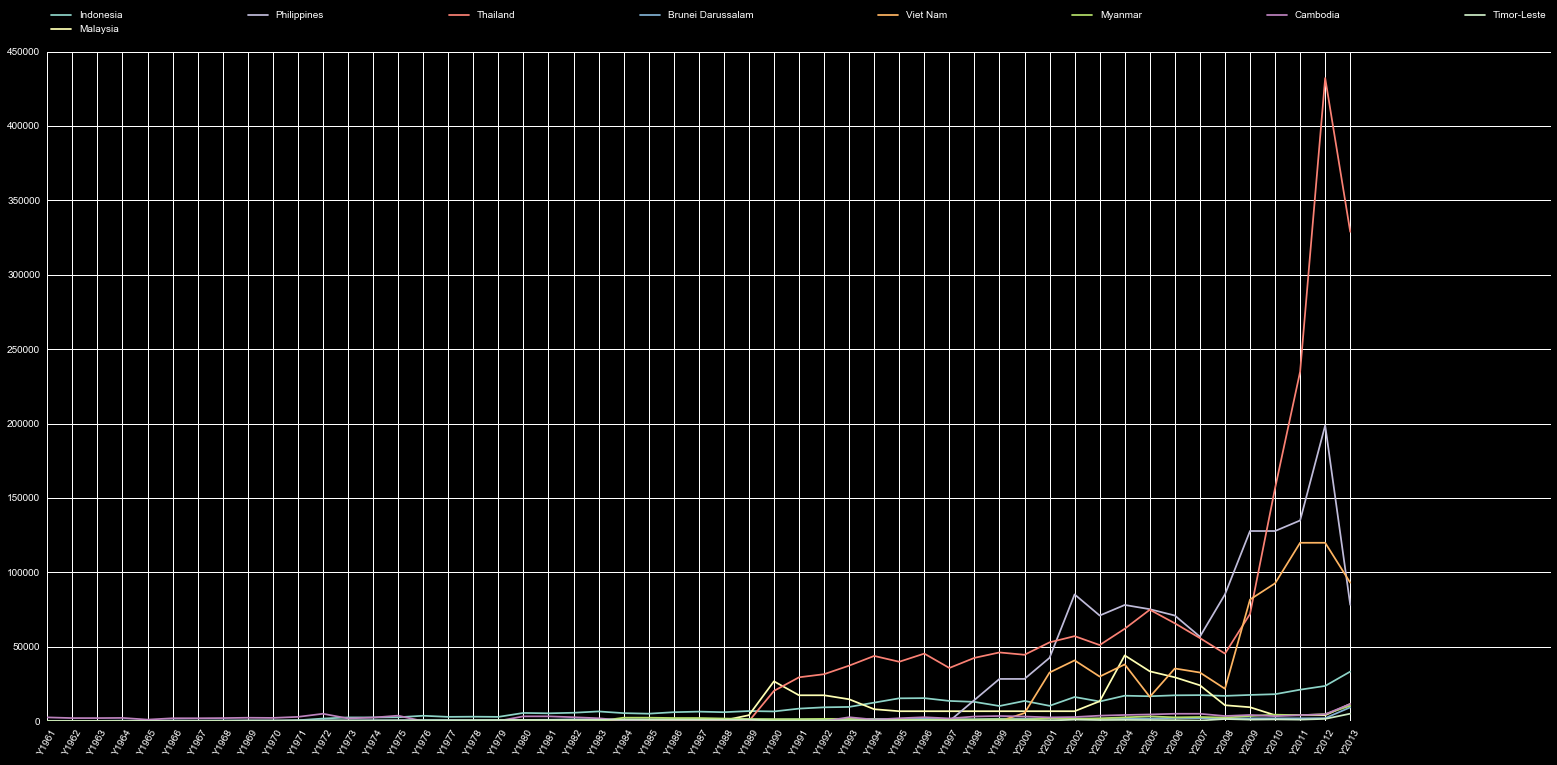

In [147]:
area_list = list(data['Area'].unique())
year_list = list(data.iloc[:,10:].columns)

plt.figure(figsize=(24,12))
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(data[yr][data['Area'] == ar].sum())
    plt.plot(yearly_produce, label=ar)
plt.xticks(np.arange(53), tuple(year_list), rotation=60)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=8, mode="expand", borderaxespad=0.)
plt.savefig('p.png')
plt.show()

Pada grafik diatas ditampilkan Plot untuk setiap produksi tahunan dari berbagai negara dengan kuantitas dalam sumbu y dan tahun dalam sumbu x. Dari grafik diatas kita dapat menganalisis bahwa negara yang mengalami kenaikan hasil produksi gandun yang paling signifikan adalah negara Thailand, yaitu pada tahun 2008 hingga 2012.

In [181]:
new_data_dict = {}
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(data[yr][data['Area']==ar].sum())
    new_data_dict[ar] = yearly_produce
new_data = pd.DataFrame(new_data_dict)

print(new_data)

    Indonesia  Malaysia  Philippines  Thailand  Brunei Darussalam  Viet Nam  \
0           0         0            0         0                240         0   
1           0         0            0         0                240         0   
2           0         0            0         0                240         0   
3           0       134            0         0                360         0   
4           0       134            0         0                360         0   
5           0       268            0         0                480         0   
6           0       268            0         0                360         0   
7           0       268            0         0                480         0   
8           0       402            0         0                480         0   
9           0       402            0         0                480         0   
10        630       402            0         0                480         0   
11       1764       402            0         0      

Pada tabel diatas merupakan kerangka data dengan negara sebagai indeks dan hasil tahunan sebagai kolom dari tahun 1961 hingga 2013. 

In [151]:
new_data = pd.DataFrame.transpose(new_data)
new_data.columns = year_list

new_data.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Indonesia,0,0,0,0,0,0,0,0,0,0,...,17136,16758,17388,17514,17010,17640,18144,21168,23688,33327
Malaysia,0,0,0,134,134,268,268,268,402,402,...,44220,33500,29480,24120,10720,9380,4020,4020,4020,11591
Philippines,0,0,0,0,0,0,0,0,0,0,...,78100,75260,71000,56800,85200,127800,127800,134900,198800,78171
Thailand,0,0,0,0,0,0,0,0,0,0,...,62118,74907,65772,55854,45414,72036,156600,234900,432216,328860
Brunei Darussalam,240,240,240,360,360,480,360,480,480,480,...,1800,1800,2160,2040,1920,1920,1920,1920,2040,9300


Pada tabel diatas saya hanya menyederhanakan tampilannya dengan menggunakan fungsi transpose pada tabel agar lebih mudah untuk dipelajari.

In [122]:
# Penjumlahan data produksi dari tahun 2003 hingga tahun 2013

data['total'] = (data['Y2003'] + data['Y2004'] + data['Y2005'] + data['Y2006'] + data['Y2007'] + 
    data['Y2008'] + data['Y2009'] + data['Y2010'] + data['Y2011'] + data['Y2012'] + data['Y2013'] )

Proses diatas merupakan proses penjumlahan data produksi 10 tahun terakhir dan kemudian akan saya jadikan variabel 'total'.

In [123]:
data.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total
count,1206.000000,1206.0,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,...,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000
mean,142.208126,2511.0,5419.807629,9.670141,108.605498,2.386401,2.001658,2.001658,2.308458,1.417910,...,188.325871,190.279436,163.553897,157.106136,264.681592,340.024876,436.096186,656.348259,481.980100,3239.894693
std,70.649640,0.0,167.735930,8.241751,9.034063,6.431376,5.258307,5.258307,5.522437,2.660511,...,162.894607,155.470574,126.621480,175.189923,309.133115,354.400106,451.925563,712.335269,475.378336,2943.580817
min,26.000000,2511.0,5142.000000,-8.870000,95.960000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,8.000000,5.000000,16.000000,12.000000,14.000000,12.000000,17.000000,16.000000,130.000000
25%,101.000000,2511.0,5142.000000,4.210000,100.990000,0.000000,0.000000,0.000000,0.000000,0.000000,...,29.000000,23.000000,25.000000,22.000000,31.000000,29.000000,30.000000,30.000000,86.250000,412.000000
50%,131.000000,2511.0,5521.000000,12.880000,104.990000,0.000000,0.000000,0.000000,0.000000,0.000000,...,150.000000,220.000000,180.000000,135.000000,140.000000,144.000000,168.000000,188.000000,236.500000,1662.500000
75%,216.000000,2511.0,5521.000000,15.870000,114.730000,1.000000,1.000000,1.000000,1.000000,2.000000,...,287.000000,252.000000,214.000000,174.000000,276.000000,600.000000,900.000000,1400.000000,867.750000,6132.750000
max,237.000000,2511.0,5521.000000,21.910000,125.730000,22.000000,18.000000,18.000000,19.000000,9.000000,...,530.000000,500.000000,400.000000,600.000000,900.000000,900.000000,1100.000000,1656.000000,1390.000000,7851.000000


Saya menggunakan fungsi describe untuk melihat informasi sekilas tentang data yang telah saya buat

### Analisis Data Produksi Pangan Negara ASEAN Berdasarkan Geolokasi

In [124]:
df = data['Area'].value_counts().sort_index().index
df2 = data.groupby('Area')['total'].agg('mean')

trace = go.Choropleth(
    locationmode = 'country names',
    locations = df,
    text = df,
    colorscale = 'Rainbow',
    z = df2.values
)
df3 = [trace]
layout = go.Layout(
    title = 'Nilai Produksi Rata-Rata Negara ASEAN Tahun 2003-2013')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

Visualisasi diatas merupakan visualisasi berdasarkan data nilai rata-rata produksi setiap negara ASEAN pada 10 tahun terakhir

In [125]:
df = data['Area'].value_counts().sort_index().index
df2 = data.groupby('Area')['Y2003'].agg('mean')

trace = go.Choropleth(
    locationmode = 'country names',
    locations = df,
    text = df,
    colorscale = 'Rainbow',
    z = df2.values
)
df3 = [trace]
layout = go.Layout(
    title = 'Nilai Produksi Rata-Rata Negara ASEAN Tahun 2003')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

Visualisasi diatas merupakan visualisasi berdasarkan data nilai rata-rata produksi setiap negara ASEAN pada tahun 2003

In [126]:
df = data['Area'].value_counts().sort_index().index
df2 = data.groupby('Area')['Y2013'].agg('mean')

trace = go.Choropleth(
    locationmode = 'country names' ,
    locations = df,
    text = df,
    colorscale = 'Rainbow',
    z = df2.values
)
df3 = [trace]
layout = go.Layout(
    title = 'Nilai Produksi Rata-Rata Negara ASEAN Tahun 2013')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

In [ ]:
Visualisasi diatas merupakan visualisasi berdasarkan data nilai rata-rata produksi setiap negara ASEAN pada tahun 2013

In [127]:
# Menghapus variabel total

data = data.drop(['total'], axis = 1)

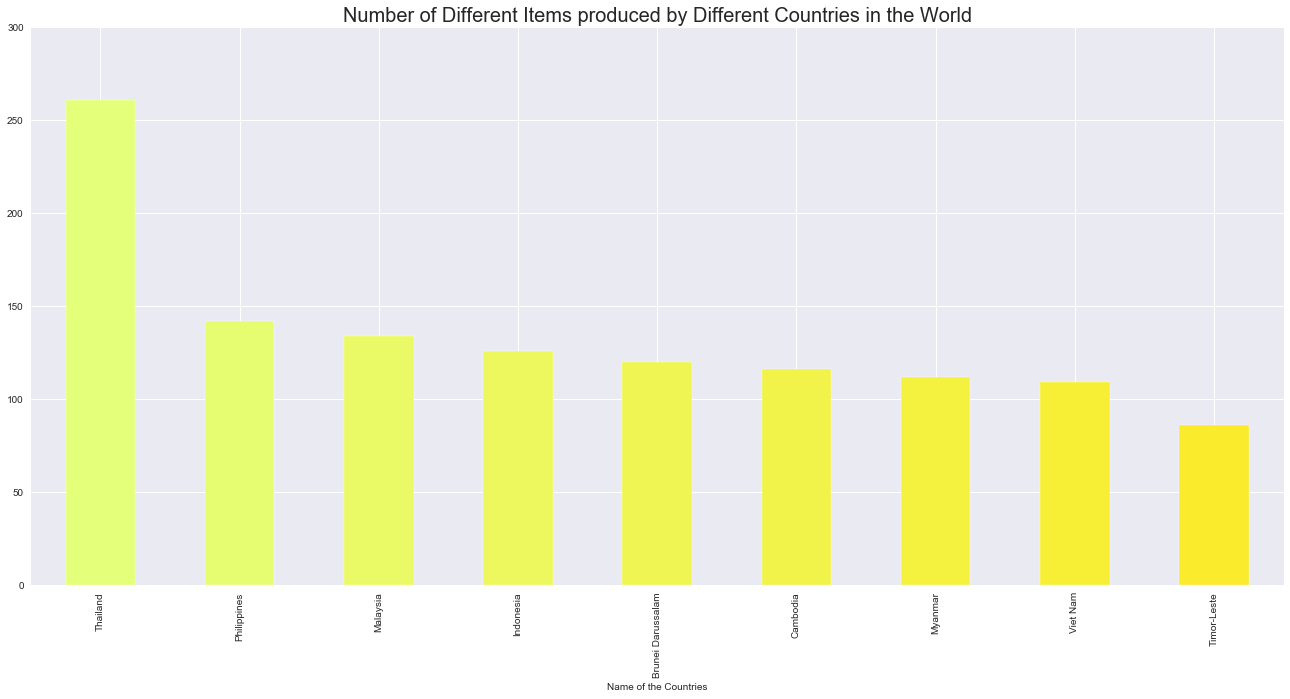

In [128]:
color = plt.cm.Wistia(np.linspace(0, 1, 40))
plt.style.use('seaborn')

data['Area'].value_counts().sort_values(ascending = False).head(40).plot.bar(figsize = (20, 10), color = color)
plt.title('Number of Different Items produced by Different Countries in the World', fontsize = 20)
plt.xlabel('Name of the Countries', fontsize = 10)
plt.show()

Pada tabel diatas kita dapat melihat peringkat negara yang terbanyak memproduksi gandum. Pada posisi pertama yaitu Thailand dan pada posisi terakhir yaitu Timur Leste. 

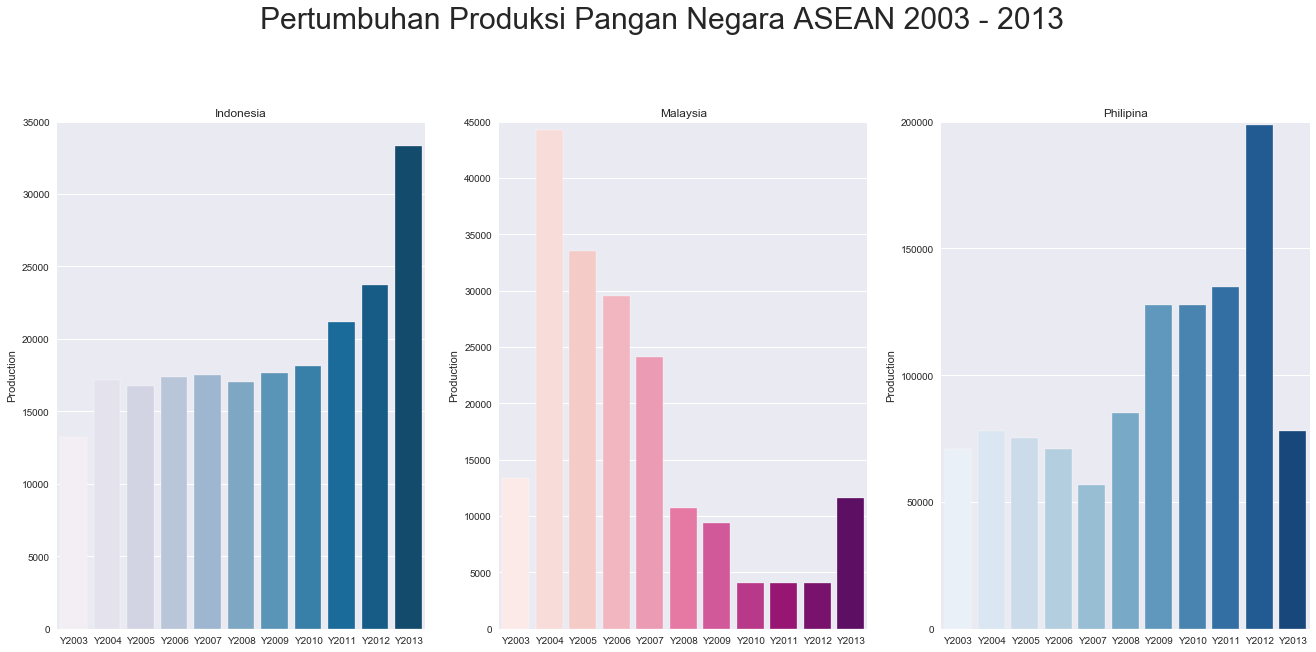

In [129]:
# setting the size of the plot
plt.rcParams['figure.figsize'] = (20, 20)

# Pertumbuhan Produksi Pangan Indonesia
indonesia_production = pd.DataFrame(data[data['Area'] == 'Indonesia'].loc[:, "Y2003": "Y2013"].agg("sum", axis = 0))

indonesia_production.columns = ['Production']
plt.subplot(231)
sns.barplot(x = indonesia_production.index, y = indonesia_production.Production, data = indonesia_production, palette = 'PuBu')
plt.gca().set_title("Indonesia")

# Pertumbuhan Produksi Pangan Malaysia
malaysia_production = pd.DataFrame(data[data['Area'] == 'Malaysia'].loc[:, "Y2003":"Y2013"].agg("sum", axis = 0))

malaysia_production.columns = ['Production']
plt.subplot(232)
sns.barplot(x = malaysia_production.index, y = malaysia_production.Production, data = malaysia_production, palette = 'RdPu')
plt.gca().set_title("Malaysia")# Pertumbuhan Produksi Pangan Philipina
philippines_production = pd.DataFrame(data[data['Area'] == 'Philippines'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

philippines_production.columns = ['Production']
plt.subplot(233)
sns.barplot(x = philippines_production.index, y = philippines_production.Production, data = philippines_production, palette = 'Blues')
plt.gca().set_title("Philipina")

plt.suptitle('Pertumbuhan Produksi Pangan Negara ASEAN 2003 - 2013', fontsize = 30)
plt.show()

Grafik diatas menunjukkan pertumbuhan jumlah produksi gandum dari 3 negara yaitu Indonesia, Malaysia, dan Philipina

Text(0.5, 1.0, 'Vietnam')

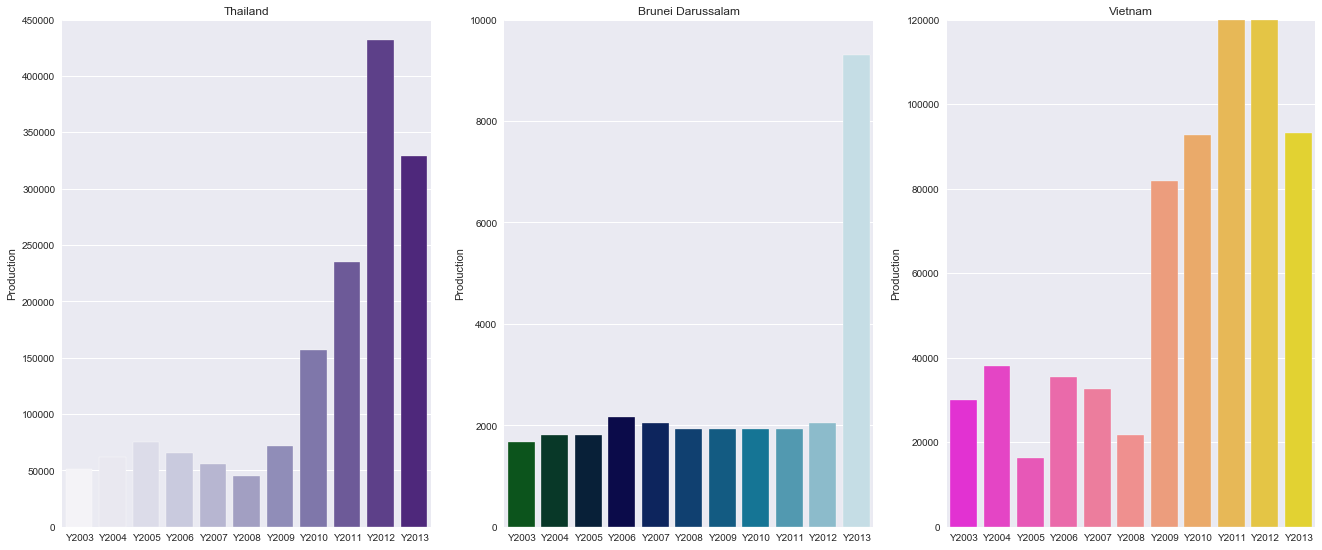

In [130]:
# setting the size of the plot
plt.rcParams['figure.figsize'] = (20, 20)

# Pertumbuhan Produksi Pangan Thailand
thailand_production = pd.DataFrame(data[data['Area'] == 'Thailand'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

thailand_production.columns = ['Production']
plt.subplot(234)
sns.barplot(x = thailand_production.index, y = thailand_production.Production, data = thailand_production, palette = 'Purples')
plt.gca().set_title("Thailand")


# Pertumbuhan Produksi Pangan Brunei Darussalam
brunei_production = pd.DataFrame(data[data['Area'] == 'Brunei Darussalam'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

brunei_production.columns = ['Production']
plt.subplot(235)
sns.barplot(x = brunei_production.index, y = brunei_production.Production, data = brunei_production, palette = 'ocean')
plt.gca().set_title("Brunei Darussalam")

# Pertumbuhan Produksi Pangan Vietnam
vietnam_production = pd.DataFrame(data[data['Area'] == 'Viet Nam'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

vietnam_production.columns = ['Production']
plt.subplot(236)
sns.barplot(x = vietnam_production.index, y = vietnam_production.Production, data = vietnam_production, palette = 'spring')
plt.gca().set_title("Vietnam")


Grafik diatas menunjukkan pertumbuhan jumlah produksi gandum dari 3 negara yaitu Thailand, Brunei Darussalam, dan Vietnam

Text(0.5, 1.0, 'Timor-Leste')

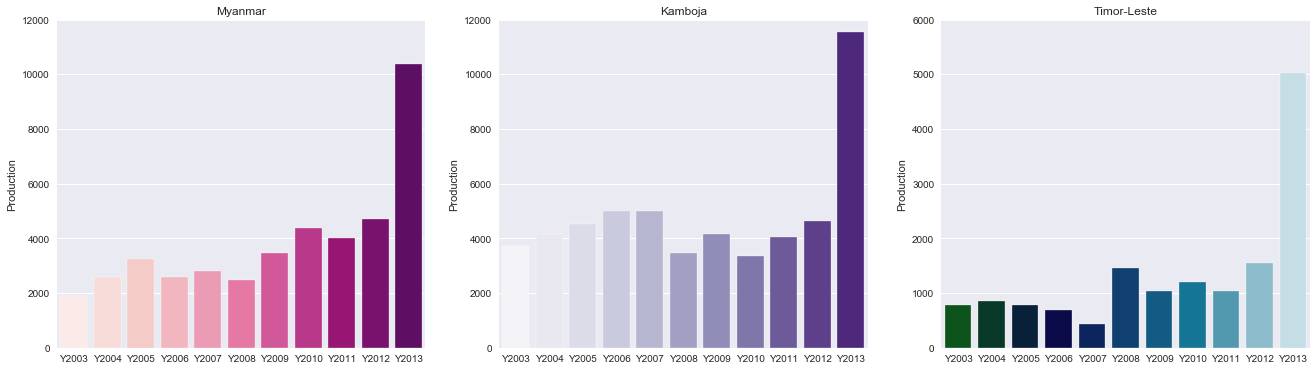

In [131]:
# setting the size of the plot
plt.rcParams['figure.figsize'] = (20, 20)

# Pertumbuhan Produksi Pangan Myanmar
myanmar_production = pd.DataFrame(data[data['Area'] == 'Myanmar'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

myanmar_production.columns = ['Production']
plt.subplot(331)
sns.barplot(x = myanmar_production.index, y = myanmar_production.Production, data = myanmar_production, palette = 'RdPu')
plt.gca().set_title("Myanmar")

# Pertumbuhan Produksi Pangan Kamboja
kamboja_production = pd.DataFrame(data[data['Area'] == 'Cambodia'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

kamboja_production.columns = ['Production']
plt.subplot(332)
sns.barplot(x = kamboja_production.index, y = kamboja_production.Production, data = kamboja_production, palette = 'Purples')
plt.gca().set_title("Kamboja")

# Pertumbuhan Produksi Pangan Timor-Leste
timor_production = pd.DataFrame(data[data['Area'] == 'Timor-Leste'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

timor_production.columns = ['Production']
plt.subplot(333)
sns.barplot(x = timor_production.index, y = timor_production.Production, data = timor_production, palette = 'ocean')
plt.gca().set_title("Timor-Leste")

Grafik diatas menunjukkan pertumbuhan jumlah produksi gandum dari 3 negara yaitu Myanmar, Kamboja dan Timur Leste

In [133]:
new_data['Year'] = np.linspace(2003, 2013, num = 53).astype('int')

# checking the shape of the new data
new_data.shape

(53, 10)

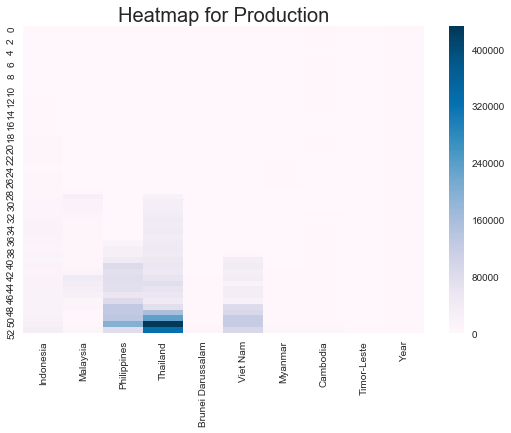

In [134]:
#heatmap

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('seaborn')
 
sns.heatmap(new_data, cmap = 'PuBu')
plt.title('Heatmap for Production', fontsize = 20)
plt.yticks()
plt.show()

Kita bisa melihat dalam grafik diatas ditampilkan Heatmap yang sumbu y nya mengacu pada tahun produksinya. Karena dalam hal ini kita masih menganalisis dalam jangka waktu 10 tahun terakhir, maka data yang ditampilkan adalah data yang bersangkutan. Kita bisa melihat dari Heatmap tersebut, produksi terbanyak ditunjukkan oleh warna biru tua yaitu tepatnya negara Thailand pada tahun 2012 (Tahun ke 50 sejak perhitungan awal).

Time Series Analysis for Top Producers

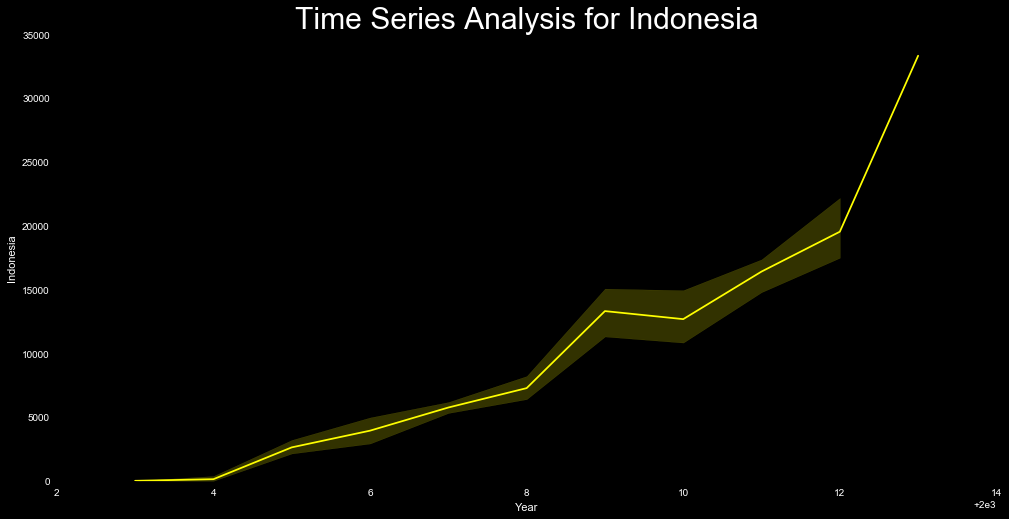

In [135]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['Indonesia'], color = 'yellow')
plt.title('Time Series Analysis for Indonesia', fontsize = 30)
plt.grid()
plt.show()

Diatas merupakan grafik pertumbuhan produksi gandum negara Indonesia dalam jangka waktu 10 tahun terakhir

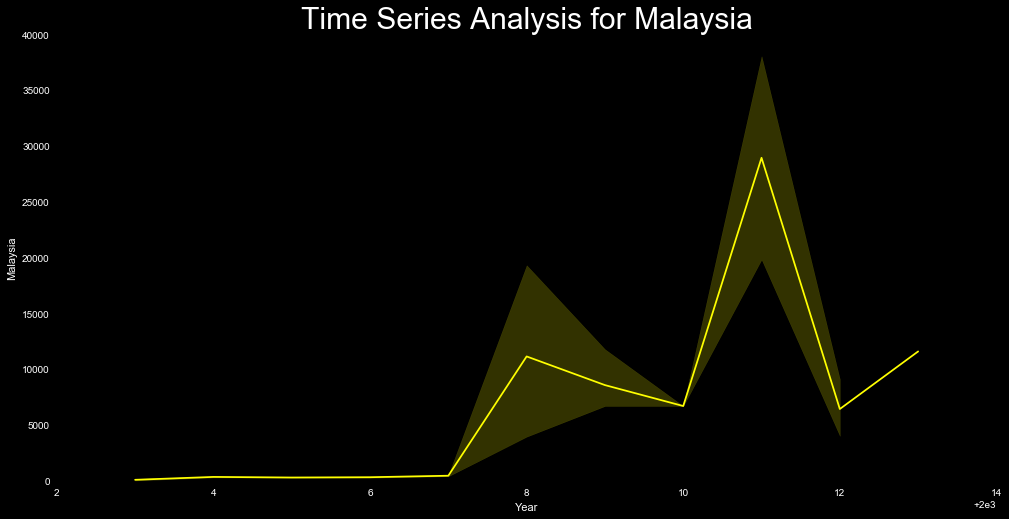

In [136]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['Malaysia'], color = 'yellow')
plt.title('Time Series Analysis for Malaysia', fontsize = 30)
plt.grid()
plt.show()

Diatas merupakan grafik pertumbuhan produksi gandum negara Malaysia dalam jangka waktu 10 tahun terakhir

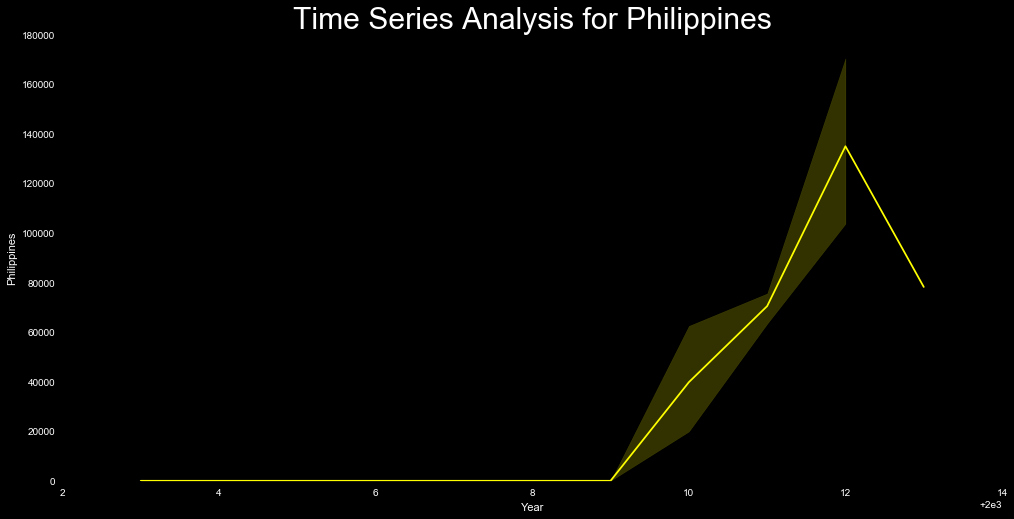

In [137]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['Philippines'], color = 'yellow')
plt.title('Time Series Analysis for Philippines', fontsize = 30)
plt.grid()
plt.show()

Diatas merupakan grafik pertumbuhan produksi gandum negara Philipina dalam jangka waktu 10 tahun terakhir

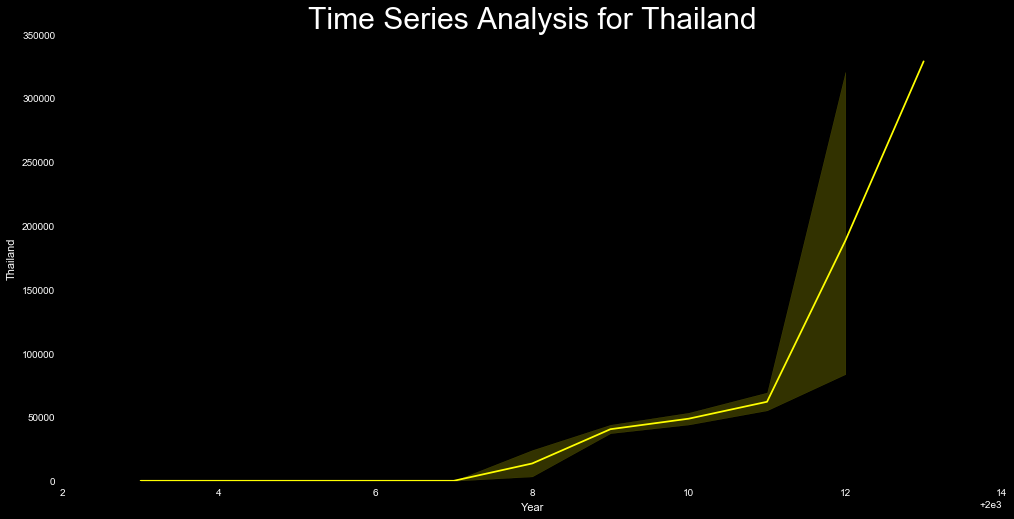

In [138]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['Thailand'], color = 'yellow')
plt.title('Time Series Analysis for Thailand', fontsize = 30)
plt.grid()
plt.show()

Diatas merupakan grafik pertumbuhan produksi gandum negara Thailand dalam jangka waktu 10 tahun terakhir

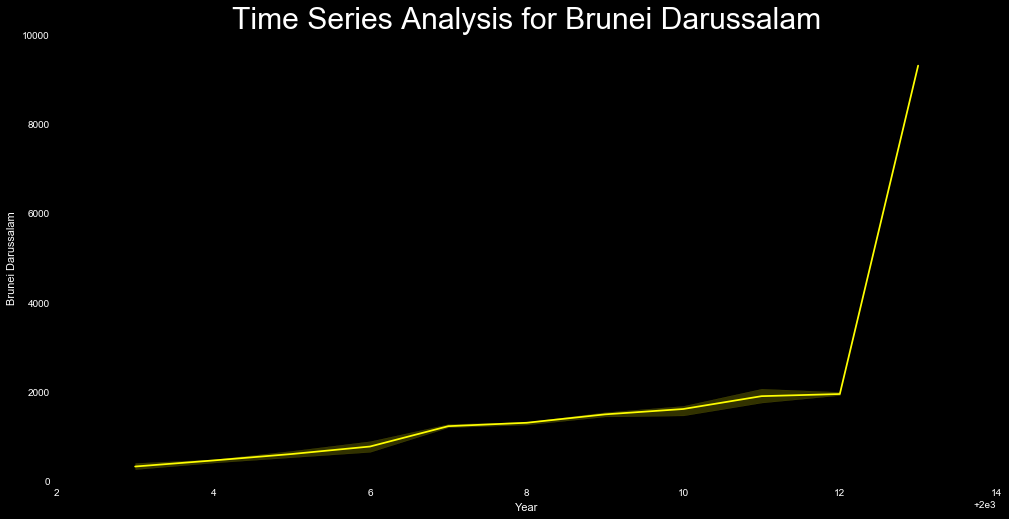

In [139]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['Brunei Darussalam'], color = 'yellow')
plt.title('Time Series Analysis for Brunei Darussalam', fontsize = 30)
plt.grid()
plt.show()

Diatas merupakan grafik pertumbuhan produksi gandum negara Brunei Darussalam dalam jangka waktu 10 tahun terakhir

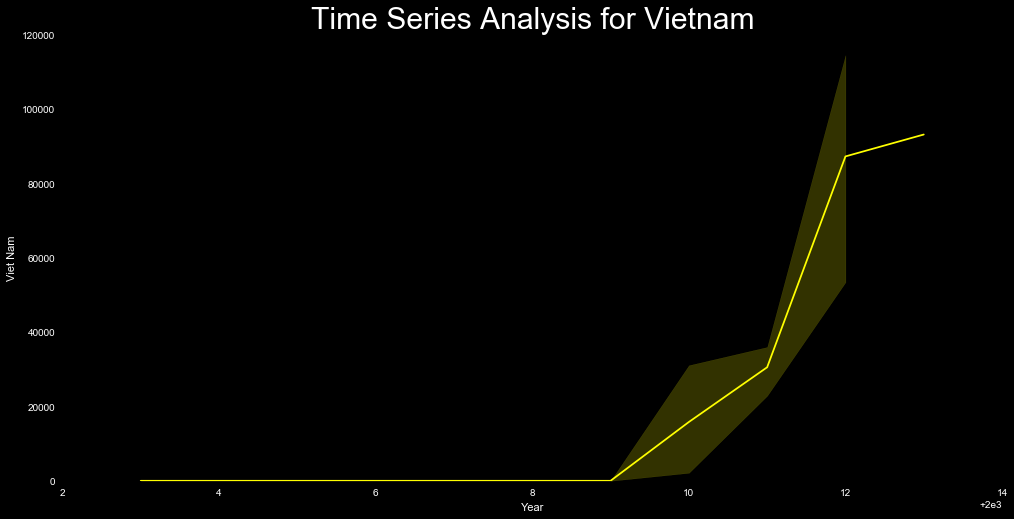

In [140]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['Viet Nam'], color = 'yellow')
plt.title('Time Series Analysis for Vietnam', fontsize = 30)
plt.grid()
plt.show()

Diatas merupakan grafik pertumbuhan produksi gandum negara Vietnam dalam jangka waktu 10 tahun terakhir

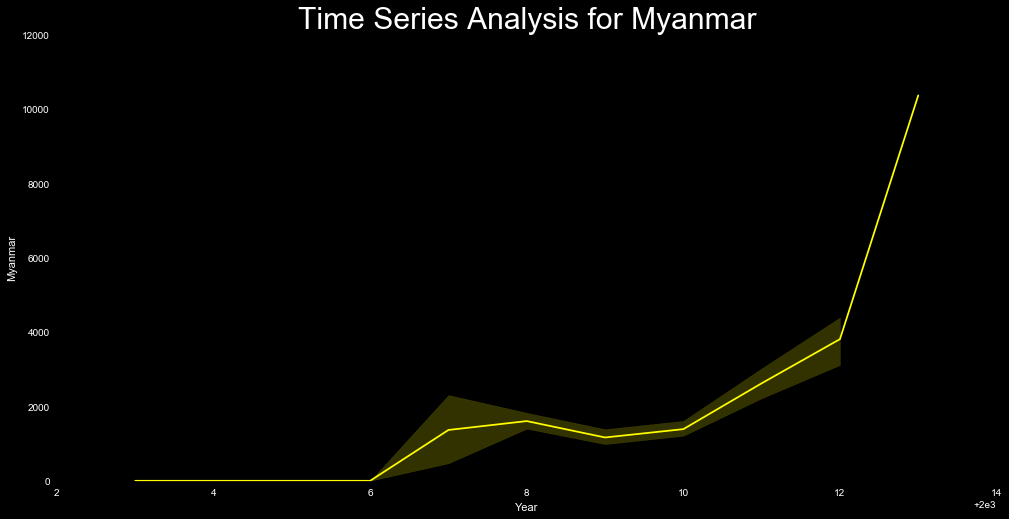

In [141]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['Myanmar'], color = 'yellow')
plt.title('Time Series Analysis for Myanmar', fontsize = 30)
plt.grid()
plt.show()

In [ ]:
Diatas merupakan grafik pertumbuhan produksi gandum negara Myanmar dalam jangka waktu 10 tahun terakhir

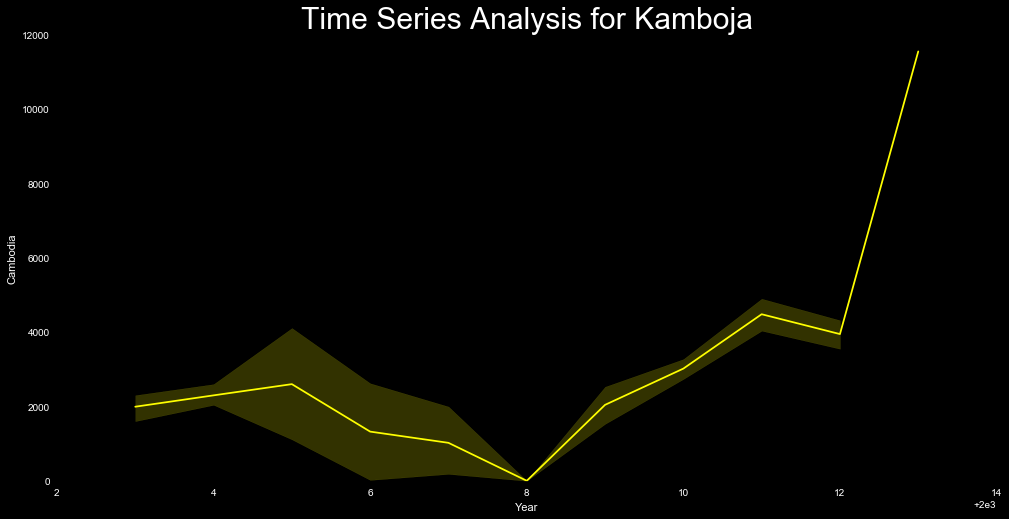

In [142]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['Cambodia'], color = 'yellow')
plt.title('Time Series Analysis for Kamboja', fontsize = 30)
plt.grid()
plt.show()

In [ ]:
Diatas merupakan grafik pertumbuhan produksi gandum negara Kamboja dalam jangka waktu 10 tahun terakhir

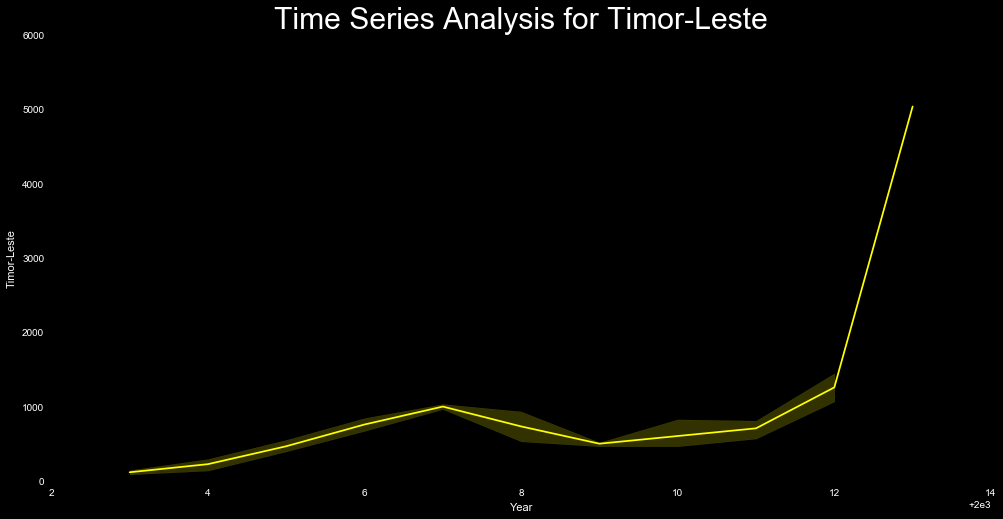

In [143]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['Timor-Leste'], color = 'yellow')
plt.title('Time Series Analysis for Timor-Leste', fontsize = 30)
plt.grid()
plt.show()

In [ ]:
Diatas merupakan grafik pertumbuhan produksi gandum negara Timur Leste dalam jangka waktu 10 tahun terakhir

In [182]:
new_data.head()

,Indonesia,Malaysia,Philippines,Thailand,Brunei Darussalam,Viet Nam,Myanmar,Cambodia,Timor-Leste
0,0,0,0,0,240,0,0,2552,86
1,0,0,0,0,240,0,0,2088,86
2,0,0,0,0,240,0,0,2088,86
3,0,134,0,0,360,0,0,2204,86
4,0,134,0,0,360,0,0,1044,172


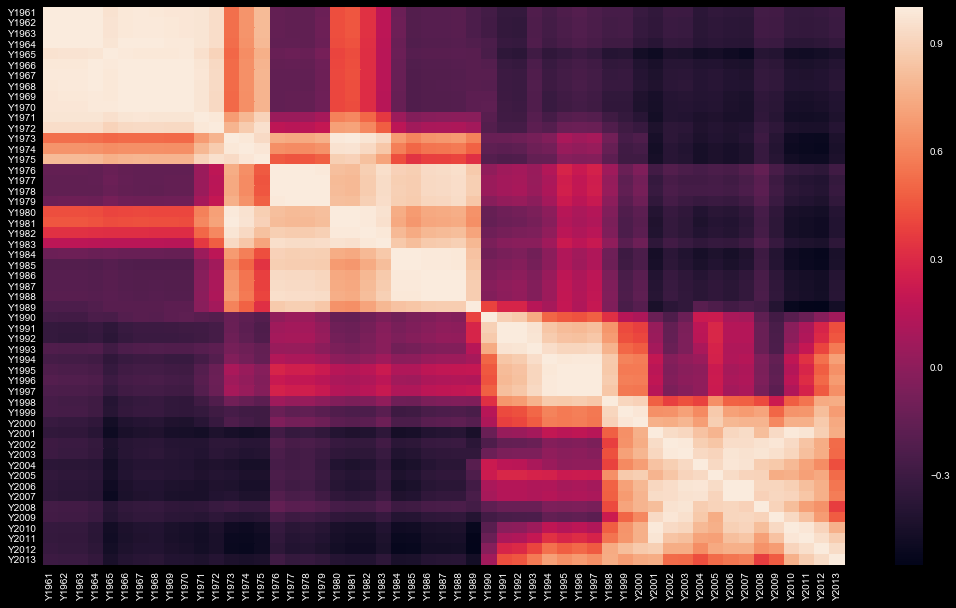

In [178]:
year_data = data.iloc[:,10:]
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(year_data.corr(), ax=ax)

Pada Heatmap diatas ditunjukkan perbandingan antara tahun. Dalam hal ini, sumbu x diawali dengan tahun 1961 dan diakhiri oleh tahun 2013 dan sedangkan sumbu y adalah kebalikan dari sumbu x. Sehingga terbentuklah heatmap diatas dan kitabisa melihat korelasinya.

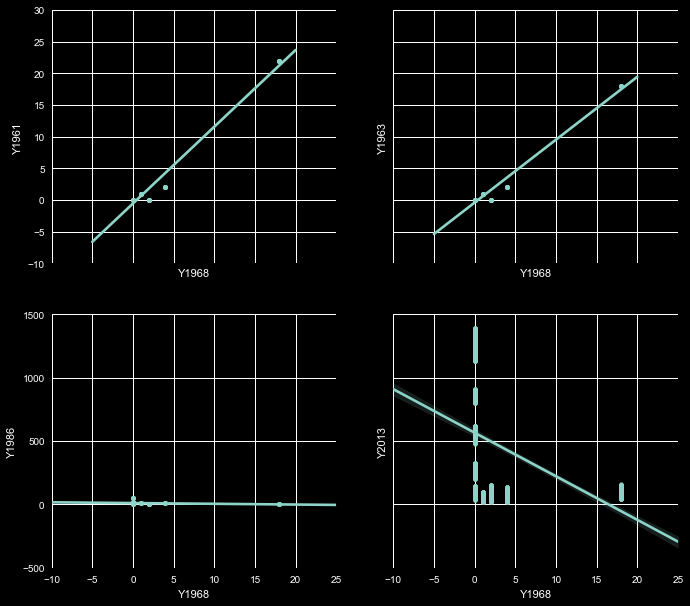

In [180]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,10))
ax1.set(xlabel='Y1968', ylabel='Y1961')
ax2.set(xlabel='Y1968', ylabel='Y1963')
ax3.set(xlabel='Y1968', ylabel='Y1986')
ax4.set(xlabel='Y1968', ylabel='Y2013')
sns.jointplot(x="Y1968", y="Y1961", data=data, kind="reg", ax=ax1)
sns.jointplot(x="Y1968", y="Y1963", data=data, kind="reg", ax=ax2)
sns.jointplot(x="Y1968", y="Y1986", data=data, kind="reg", ax=ax3)
sns.jointplot(x="Y1968", y="Y2013", data=data, kind="reg", ax=ax4)
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

Pada grafik diatas kita membandingkan data produksi gandum tahun 1961, 1963, 1986 dan tahun 2013 dengan tahun 1968. 

In [163]:
X = new_data.iloc[:,:].values

X = pd.DataFrame(X)
X = X.convert_objects(convert_numeric=True)
X.columns = year_list

C:\Users\Zafran Tsany\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



Analisis atau pengelompokan klaster adalah tugas pengelompokan sebuah set objek sedemikian rupa sehingga objek dalam kelompok yang sama (disebut cluster) lebih mirip (dalam beberapa hal) satu sama lain daripada dengan mereka yang berada dalam kelompok lain (cluster). Hal tersebut merupakan tugas utama data mining eksplorasi, dan teknik umum untuk analisis data statistik, digunakan di banyak bidang, termasuk pembelajaran mesin, pengenalan pola, analisis gambar, pencarian informasi, bioinformatika, kompresi data, dan grafik komputer

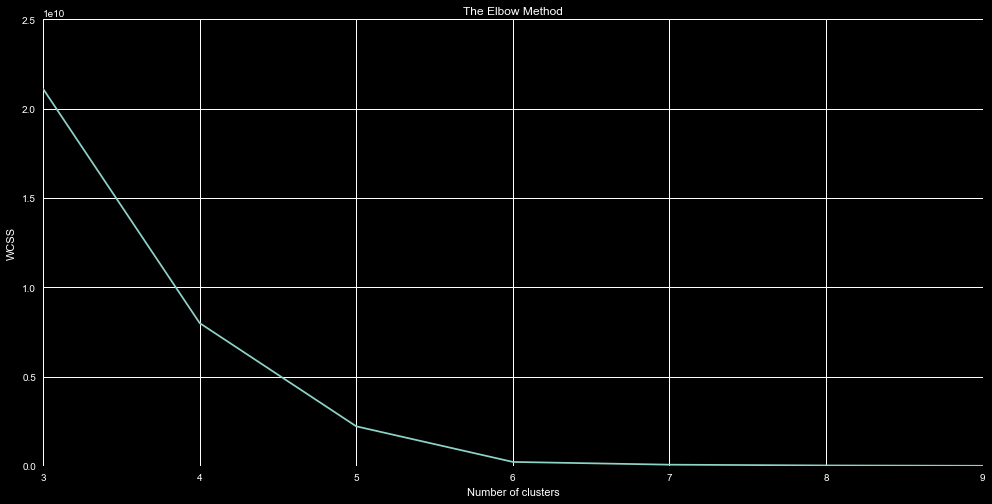

In [175]:
from sklearn.cluster import KMeans
wcss = []
for i in range(3,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(3,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [176]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)

C:\Users\Zafran Tsany\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



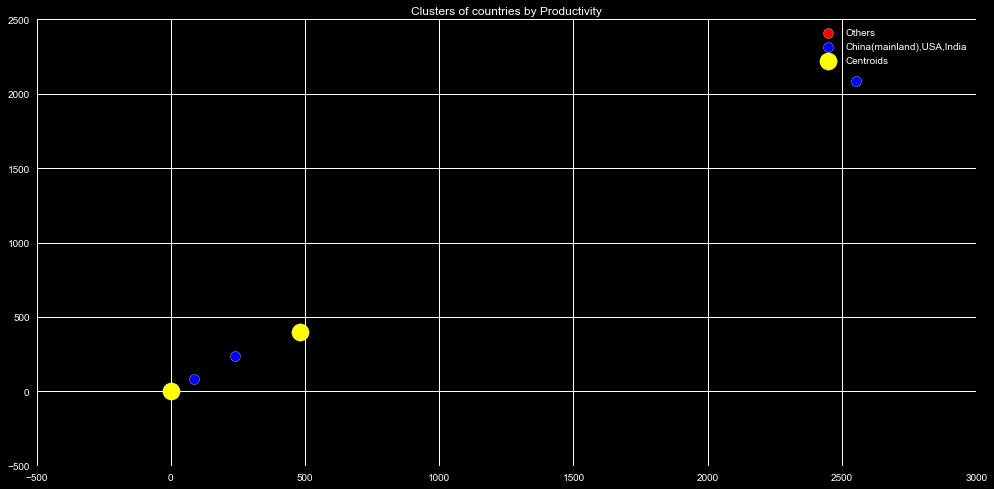

In [177]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='Others')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='China(mainland),USA,India')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of countries by Productivity')
plt.legend()
plt.show()